# LINEAR REGRESSION MODEL 

**Sneha Pawar**

In [7]:
# libraries for numerical
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [2]:
import pandas as pd
house_df = pd.read_csv('house_dataset1.csv')

In [3]:
house_df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# Data Description 

CRIM:Per capita crime rate by town

ZN:Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS:Proportion of non-retail business acres per town

CHAS:Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX:Nitric oxide concentration (parts per 10 million)

RM:Average number of rooms per dwelling

AGE:Proportion of owner-occupied units built prior to 1940

DIS:Weighted distances to five Boston employment centers

RAD:Index of accessibility to radial highways

TAX:Full-value property tax rate per $10,000

PTRATIO:Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [4]:
house_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# EDA and Preprocessing

In [5]:
house_df["CRIM"] = house_df.CRIM.fillna(house_df['CRIM'].mean())
house_df["ZN"] = house_df.ZN.fillna(house_df['ZN'].mean())
house_df["INDUS"] = house_df.INDUS.fillna(house_df['INDUS'].mean())
house_df["CHAS"] = house_df.CHAS.fillna(house_df['CHAS'].mean())
house_df["AGE"] = house_df.AGE.fillna(house_df['AGE'].mean())
house_df["LSTAT"] = house_df.LSTAT.fillna(house_df['LSTAT'].mean())

In [6]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


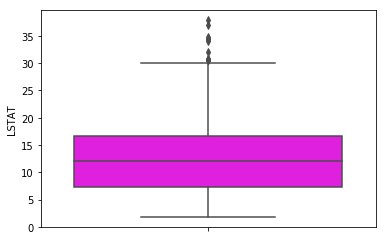

In [13]:
sns.boxplot(house_df['LSTAT'],orient='v',color='Magenta')

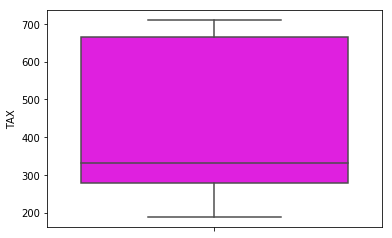

In [14]:
sns.boxplot(house_df['TAX'],orient='v',color='Magenta')

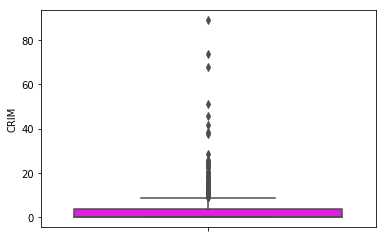

In [15]:
sns.boxplot(house_df['CRIM'],orient='v',color='Magenta')

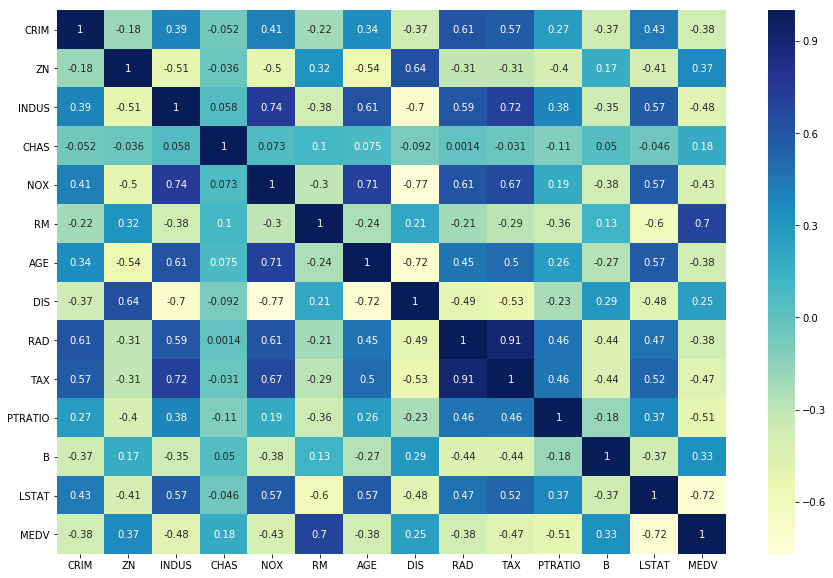

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(house_df.corr(),annot=True,cmap='YlGnBu')

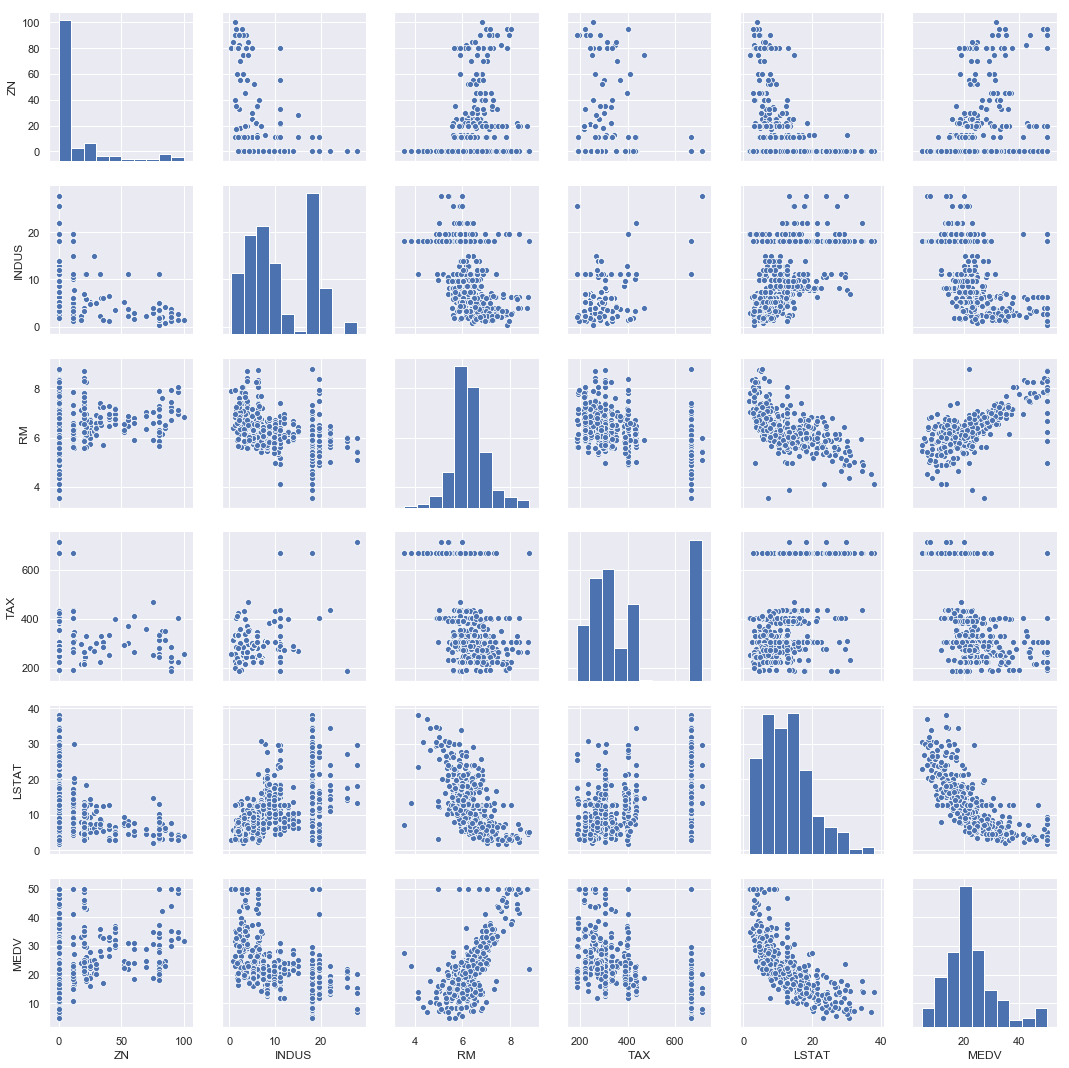

In [18]:
sns.set()
col=['ZN','INDUS','RM','TAX','LSTAT','MEDV']
sns.pairplot(house_df[col])
plt.show()

# Model Building

In [19]:
X = house_df.drop('MEDV', axis = 1)
y = house_df['MEDV']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
pred_train = model.predict(X_train)

In [24]:
pred = model.predict(X_test)

In [26]:
pred

array([ 9.41346721, 23.1767502 , 24.67881534, 21.63118084, 31.45301747,
       14.0391045 , 19.40856721, 18.26723681, 27.87251844, 17.80177636,
       14.91981808, 20.47613602, 37.27305855, 23.30616002, 15.90605715,
       20.2370868 , 27.54748484, 12.06938137, 15.7675461 , 22.12112594,
       22.32607205, 14.51700015, 20.5054766 , 32.64098276, 22.60475469,
       27.47659949, 23.31439781,  7.36272299, 25.63993635, 19.45829913,
       21.10349443,  8.29855426, 24.48522637, 24.99024113, 35.47931982,
       25.91029323, 40.06207688,  2.00456159, 31.39747519, 32.24907026,
       20.09834719, 22.80092858, 17.19207302, 31.5399457 , 18.93112234,
       18.3369041 , 27.74211897, 28.21302906, 18.54278898, 21.03803812,
       43.02139578, 13.23966758, 27.75345864, 35.01015842, 16.67783068,
       30.40841199,  5.88887372, 13.85021444, 18.86568609, 19.39300583,
       14.39900754, 18.14473236, 37.19437876, 34.90500029, 18.50056018,
       12.87401856, 38.43481204, 35.98586791, 13.49520218, 19.52

# Model Evaluation

In [25]:
# Model Evaluation: you need to perform RMSE(Root mean squared error), R2 score.
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2 Score:", r2_score(y_test, pred))

RMSE: 5.479356015269854
R2 Score: 0.7222066531797517
